# Overfitting and Underfitting

Reference: [Kaggle](https://www.kaggle.com/code/ryanholbrook/overfitting-and-underfitting/tutorial)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

import tensorflow as tf

- we'll examine at the learning curves for evidence of underfitting and overfitting and look at a couple of strategies for correcting it.

## Interpreting Learning Curves

- we have two kinds of information in *training data*: **signal** and **noise**.
    - ***signal***: part that generalizes, help your model to make predictions from new data
    - ***noise***: part that is *only* true for training data
- we train a model by choosing weights or parameters that minimize the loss on a training set
- **leaning curves** are the plots of loss on the training and on the validation set, epoch by epoch.
- the training loss will go down when the mode learns signal or when it learns noise
- we have to mkae a trade: we can get the model to learn more signal at the cost of learning more noise. 
    - as long as the trade is in our favor, the validation loss will continue to decrease
- this trade-off indicates that there can be two problems that occur when training model: **not enough signal** or **too much noise**.
    - **Underfitting** the training set is when the loss is not as low as it could be because the model hasn't learned enough *signal*
    - **Overfitting** the training set is when the loss is not as low as it could be because the model learned too much *noise*

## Capcity

- refers to the *size* and *complexity* of the patterns it is able to learn
    - in NN, this will largely be determined by how manyneurons it has and how they are connected together
    - if the network is underfitting, you should ttry increasing its capacity
- to increase the capacity of a network you can either make it *wider* (more unis to existing layers) or make it *deeper* (adding more layers)
    - wider networks have an easier time learning more linear relationships
    - deeper networks prefer more nonlinear ones

## Early Stopping

- when a model is too eargily learning noite, the validation loss may start to increase during training, for that, we can simply stopt the training before the increasing starts
- once we detect that the validation loss is starting to rise again, we can reset the weights back to where the minimun occured, this ensures that the model won't learn noise and overfit the data


```
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

```


## Trying

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(50, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1),
])

In [18]:
model.compile(optimizer='adam', loss='mae')

wider.compile(optimizer='adam', loss='mae')

deeper.compile(optimizer='adam', loss='mae')

In [19]:
history_model = model.fit(
    X, y,
    batch_size=256,
    epochs=200,
)

history_wider = model.fit(
    X, y,
    batch_size=256,
    epochs=500,
)

history_deeper = model.fit(
    X, y,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 3.3573
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 3.1852
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 2.9912
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 2.8106
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 2.6106
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 2.4161
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 2.2126
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 1.9931
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7892
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 1.5472
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3324
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 1.0986
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

5/5 [==============================] - 0s 1ms/step - loss: 0.0445
Epoch 105/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 106/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0430
Epoch 107/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0448
Epoch 108/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 109/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0455
Epoch 110/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 111/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0428
Epoch 112/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 113/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0433
Epoch 114/200
5/5 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 115/200
5/5 [==============================] - 0s 1ms/step - loss: 0.0411
Epoch 116/200
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.0330
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0330
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 11/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0332
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0335
Epoch 13/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0341
Epoch 14/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0332
Epoch 15/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 16/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 17/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 18/500
5/5 [==============================] - 0s 1ms/step - lo

5/5 [==============================] - 0s 1ms/step - loss: 0.0278
Epoch 110/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 111/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0277
Epoch 112/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0278
Epoch 113/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 114/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0274
Epoch 115/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 116/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0273
Epoch 117/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 118/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0268
Epoch 119/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 120/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0281
Epoch 121/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 212/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 213/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 214/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 215/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 216/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0250
Epoch 217/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0248
Epoch 218/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 219/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 220/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 221/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0247
Epoch 222/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0247
Epoch 223/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 314/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 315/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 316/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 317/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 318/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 319/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 320/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 321/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 322/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0242
Epoch 323/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 324/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0245
Epoch 325/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 416/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 417/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0215
Epoch 418/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 419/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0216
Epoch 420/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 421/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0214
Epoch 422/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 423/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0228
Epoch 424/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 425/500
5/5 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 426/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 427/500
5/5 [==============================] - 0

9/9 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 18/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 19/200
9/9 [==============================] - 0s 998us/step - loss: 0.0221
Epoch 20/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 21/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0217
Epoch 22/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0222
Epoch 23/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 24/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0219
Epoch 25/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 26/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0234
Epoch 27/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0236
Epoch 28/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0220
Epoch 29/200
9/9 [==============================] - 0s 1ms/step

9/9 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 121/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0223
Epoch 122/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0207
Epoch 123/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 124/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 125/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 126/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0211
Epoch 127/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 128/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0218
Epoch 129/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 130/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0208
Epoch 131/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0209
Epoch 132/200
9/9 [==============================] - 0

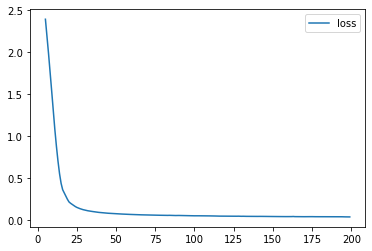

In [20]:
history_df = pd.DataFrame(history_model.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

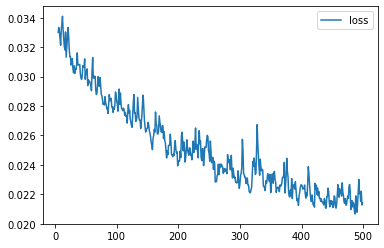

In [21]:
history_df = pd.DataFrame(history_wider.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

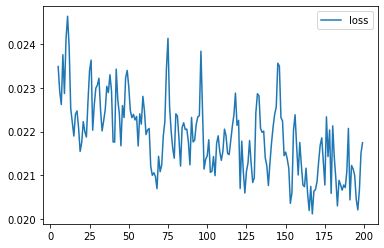

In [22]:
history_df = pd.DataFrame(history_deeper.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

## Example

In [23]:
from IPython.display import display

red_wine = pd.read_csv('red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


### Training will early stopping

In [24]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.09192487597465515


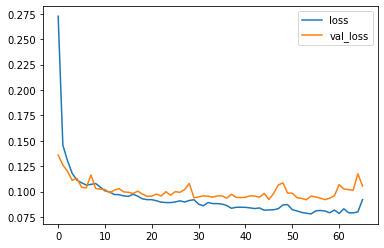

In [25]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))